# End-to-End EDA Project: Titanic Survival Analysis

## 1. Project Overview
**Objective**: To perform a comprehensive Exploratory Data Analysis (EDA) on the famous Titanic dataset to understand the factors that contributed to a passenger's survival.

**Workflow** (EDA & visualization only):
1.  **Data Loading**: Import data and libraries.
2.  **Data Cleaning**: Handle missing values and correct data types.
3.  **Univariate Analysis**: Understand each variable individually.
4.  **Bivariate Analysis**: Analyze relationships between variables and survival.
5.  **Multivariate Analysis**: Complex interactions.
6.  **Conclusion**: Summary of findings.


In [1]:
# 1. Import Essential Libraries
import pandas as pd # For DataFrame manipulation
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For advanced statistical plotting

# 2. Configuration
# Set the visual style to 'whitegrid' (clean look with grid)
sns.set_theme(style="whitegrid")

# Ensure plots are shown inside the notebook
%matplotlib inline

# Suppress warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

print("Setup Complete. Libraries Loaded.")


Setup Complete. Libraries Loaded.


## 2. Data Loading & Inspection
We will use the seaborn built-in titanic dataset.


### 📋 Titanic Column Description

| Column | Description |
|--------|-------------|
| **survived** | Survival (0 = No, 1 = Yes) – target variable |
| **pclass** | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) |
| **sex** | Gender (male / female) |
| **age** | Age in years |
| **sibsp** | Number of siblings or spouses aboard |
| **parch** | Number of parents or children aboard |
| **fare** | Passenger fare (price paid) |
| **embarked** | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |
| **class** | Ticket class as category (First, Second, Third) – same as `pclass` |
| **who** | Person type: man, woman, child |
| **adult_male** | Boolean – True if adult male |
| **deck** | Cabin deck (A–G); many missing |
| **embark_town** | Port name (Cherbourg, Queenstown, Southampton) – same as `embarked` |
| **alive** | Survival as text (yes / no) – same as `survived` |
| **alone** | True if passenger traveled alone (no sibsp or parch) |

In [2]:
# Load dataset from Seaborn's repository
df = sns.load_dataset('titanic')

# Check the first 5 rows to understand what the data looks like
print("First 5 Rows:")
display(df.head())

# Check data types and non-null counts
print("-" * 30)
print("Data Info (Types and Missing Values):")
df.info()

# Get statistical summary (mean, mix, max) for numerical columns
print("-" * 30)
print("Statistical Summary:")
display(df.describe())


First 5 Rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


------------------------------
Data Info (Types and Missing Values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
----------

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 📖 Read & Output Explained

- **head()**: First 5 rows – we see columns like survived (0/1), pclass (1–3), sex, age, fare, embarked, etc.
- **info()**: Non-null counts and dtypes. Age has 714 non-null (177 missing), embarked 889 (2 missing), deck 203 (688 missing).
- **describe()**: For numeric columns – count, mean, std, min, 25/50/75%, max. Use this to spot skew (e.g. fare has high max vs mean).


### 🔢 Explicit Missing Counts & Categorical Counts
Before cleaning, we quantify missing values and inspect key categorical distributions.


In [3]:
# Missing value counts and percentage
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Pct': missing_pct})
missing_df = missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False)
print('Missing values per column:')
print(missing_df)

# Value counts for key categoricals
print('\n--- sex ---')
print(df['sex'].value_counts())
print('\n--- pclass ---')
print(df['pclass'].value_counts())
print('\n--- embarked ---')
print(df['embarked'].value_counts(dropna=False))
print('\n--- survived ---')
print(df['survived'].value_counts())

Missing values per column:
             Missing        Pct
deck             688  77.216611
age              177  19.865320
embarked           2   0.224467
embark_town        2   0.224467

--- sex ---
male      577
female    314
Name: sex, dtype: int64

--- pclass ---
3    491
1    216
2    184
Name: pclass, dtype: int64

--- embarked ---
S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

--- survived ---
0    549
1    342
Name: survived, dtype: int64


## 3. Data Cleaning
Missing data is a common problem. Let's visualize where our data is missing.


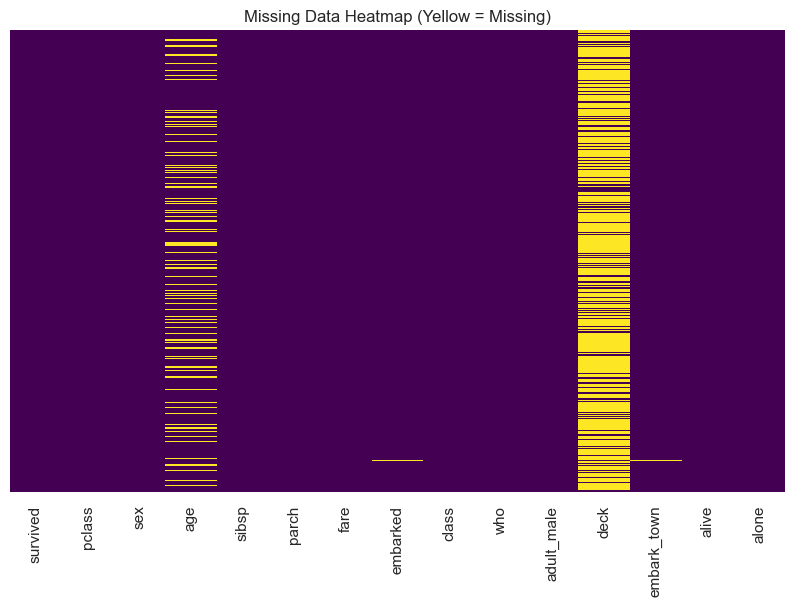

In [4]:
# Visualizing Missing Data using a Heatmap

plt.figure(figsize=(10, 6))

# sns.heatmap logic:
# df.isnull() returns a DataFrame of True/False (True if missing)
# cbar=False: Hide the color bar legend
# yticklabels=False: Hide row numbers (too messy for big data)
# cmap='viridis': Yellow = True (Missing), Purple = False (Present)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.title('Missing Data Heatmap (Yellow = Missing)')
plt.show()


### 🔎 How to Read This Chart
*   **Color Code**: Yellow lines represent **missing values (NaN)**. Purple areas are **clean data**.
*   **Columns**: Each vertical bar is a feature in the dataset.

### 💡 Key Inference
*   **Deck**: The `deck` column is almost entirely yellow. ~80% of data is missing.
*   **Age**: There are scattered yellow lines (~20% missing). This suggests we can fix it by filling in the blanks.
*   **Decision**: Drop `deck` (too broken), Impute `age` (fixable).


In [5]:
# Data Cleaning Steps

# 1. Fill Age with Median
# We use median because it's less sensitive to outliers (extremely old/young people)
df['age'].fillna(df['age'].median(), inplace=True)

# 2. Fill Embarked with Mode (Most Frequent)
# Find the most common port (Mode)
mode_embarked = df['embarked'].mode()[0]
# Fill missing spots with that port
df['embarked'].fillna(mode_embarked, inplace=True)

# 3. Drop Deck
# axis=1 means drop a COLUMN, not a row
if 'deck' in df.columns:
    df.drop('deck', axis=1, inplace=True)

# Verify Cleaning
print("Remaining Missing Values:")
print(df.isnull().sum().sum())


Remaining Missing Values:
2


### 📖 Output Explained (Data Cleaning)
- **fillna(median)** for `age`: Replaces missing ages with the median (28). Median is robust to outliers (e.g. very old passengers).
- **fillna(mode)** for `embarked`: Replaces 2 missing embarkation ports with the most frequent value (Southampton).
- **drop('deck', axis=1)**: Removes the `deck` column because it had too many missing values (688/891) to impute reliably.
- **Remaining Missing: 0** confirms no nulls are left; the dataset is ready for analysis.

## 4. Univariate Analysis
Analyzing variables one by one.


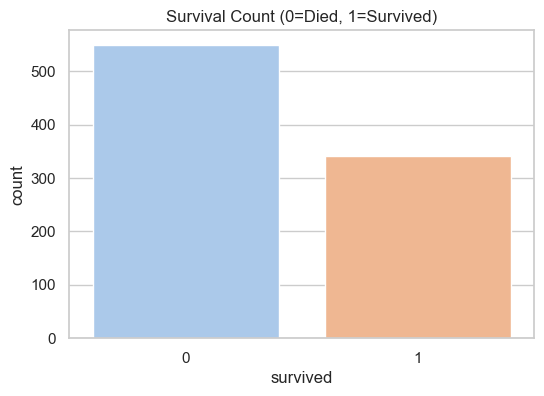

In [6]:
# Target Variable: Survived

plt.figure(figsize=(6, 4))
# Countplot counts the number of observations in each category
sns.countplot(data=df, x='survived', palette='pastel')

plt.title('Survival Count (0=Died, 1=Survived)')
plt.show()


### 💡 Key Inference
*   **Imbalance**: Significantly more people died (0) than survived (1).
*   **Baseline Accuracy**: If we just guessed "Died" for everyone, we'd be right about 60% of the time. Our model needs to beat this baseline.


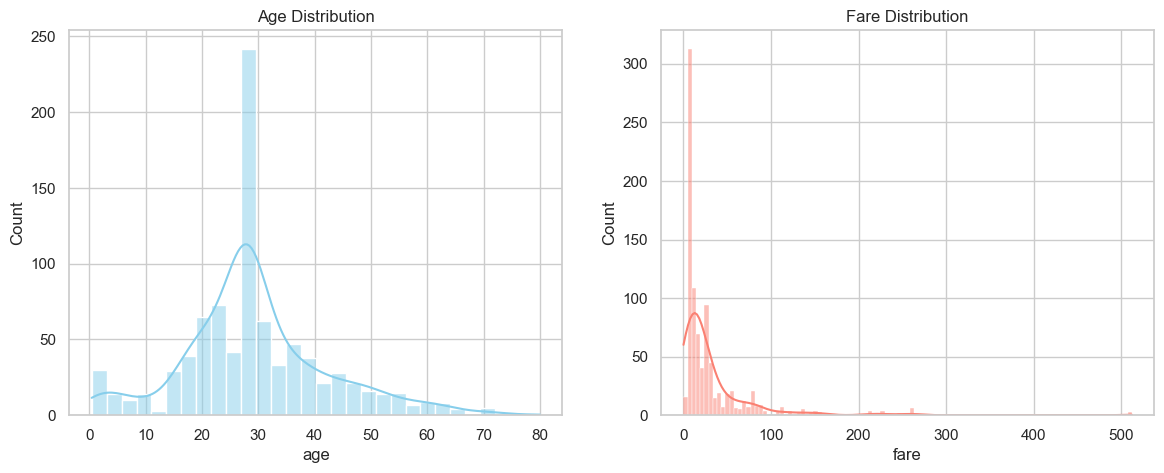

In [7]:
# Numerical Distribution: Age & Fare

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Age Distribution
sns.histplot(df['age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

# Plot 2: Fare Distribution
sns.histplot(df['fare'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Fare Distribution')

plt.show()


### 📊 Correlation Matrix (Numerical Features)
We compute **Pearson correlation** between numerical columns. Values range from -1 (negative) to +1 (positive). This helps spot linear relationships before bivariate plots.

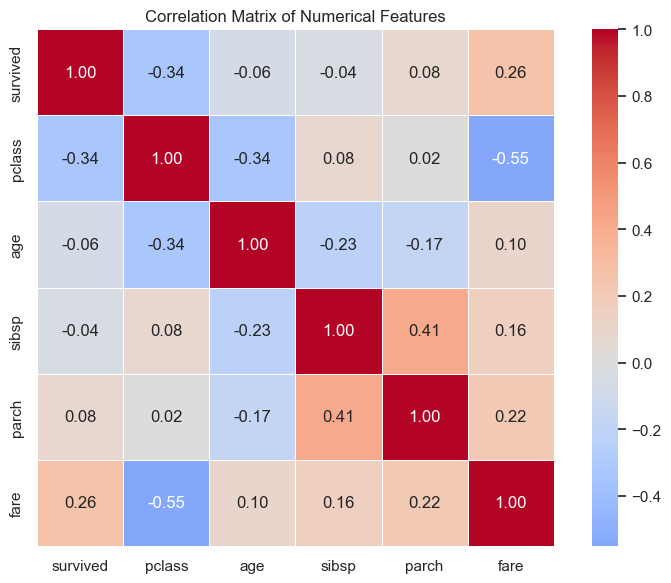

In [8]:
# Select only numerical columns for correlation
num_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

### 🔎 How to Read the Correlation Heatmap
- **annot=True**: Each cell shows the correlation value (e.g. survived vs fare ≈ 0.26).
- **Positive (red)**: As one variable increases, the other tends to increase (e.g. pclass vs fare negative = 1st class paid more).
- **Negative (blue)**: Inverse relationship (e.g. pclass vs survived: lower class → lower survival).
- **Near 0**: Weak linear relationship. Strongest predictors of survival here are pclass and fare (socio-economic proxy).

### 🔎 How to Read These Charts
*   **X-Axis**: The range of values (Years for Age, Dollars for Fare).
*   **Y-Axis**: Count of passengers in that range.

### 💡 Key Inference
*   **Age**: Roughly normal distribution (bell curve), with a spike for median imputation and a small spike for babies (0-5 years).
*   **Fare**: Highly **Right-Skewed**. Most tickets were cheap (<$50), but a few were extremely expensive ($500+).
*   **Action**: Because of the skew in `Fare`, a log-transformation might be useful so the model isn't confused by the huge numbers.


## 5. Bivariate Analysis
How do features relate to Survival?


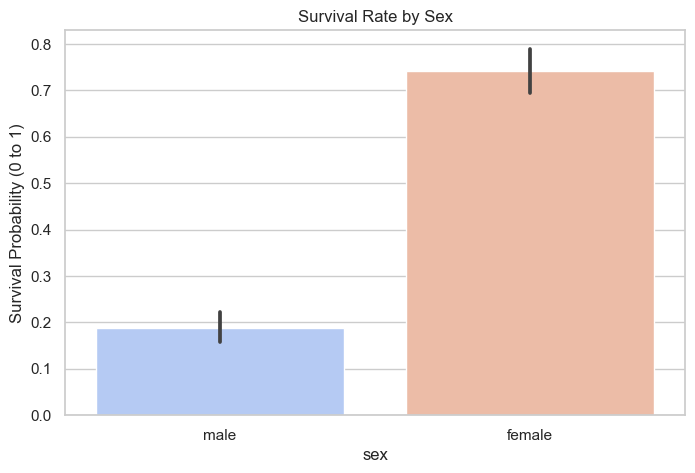

In [9]:
# Survival by Sex (Bar Plot)

plt.figure(figsize=(8, 5))

# Barplot shows the MEAN by default. So this shows % Survival.
sns.barplot(data=df, x='sex', y='survived', palette='coolwarm')

plt.title('Survival Rate by Sex')
plt.ylabel('Survival Probability (0 to 1)')
plt.show()


### 💡 Key Inference
*   **Gender Gap**: Females had a ~74% chance of survival vs Males ~18%.
*   **Insight**: "Women and children first" was clearly enforced. Gender is likely the strongest predictor in this dataset.


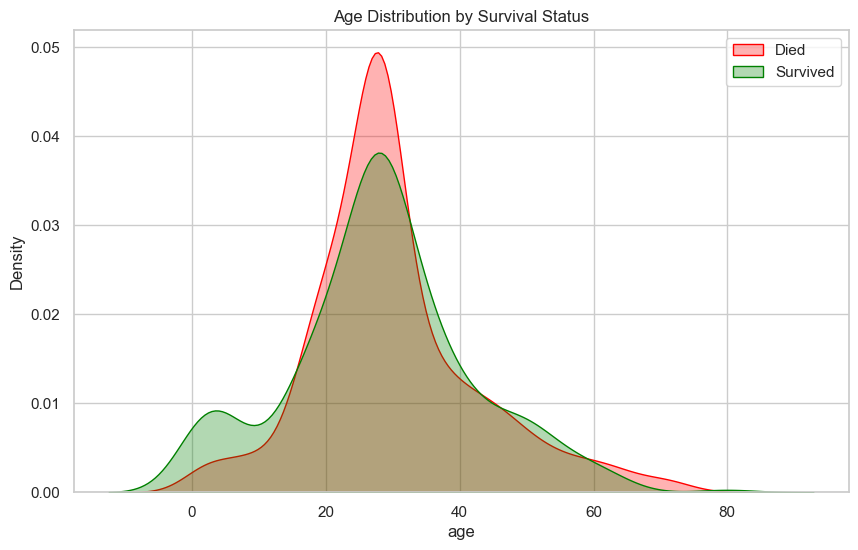

In [10]:
# Enhanced KDE Plot: Age vs Survival

plt.figure(figsize=(10, 6))

# Plot Density for those who DIED (survived=0) in RED
sns.kdeplot(data=df[df['survived'] == 0], x='age', shade=True, color='red', label='Died', alpha=0.3)

# Plot Density for those who SURVIVED (survived=1) in GREEN
sns.kdeplot(data=df[df['survived'] == 1], x='age', shade=True, color='green', label='Survived', alpha=0.3)

plt.title('Age Distribution by Survival Status')
plt.legend() # Show the label box
plt.show()


### 🔎 How to Read This Chart
*   **Overlaps**: Where Green is higher than Red, that age group had better odds of survival.
*   **Peaks**: The highest point of the curve shows the most common age for that group.

### 💡 Key Inference
*   **Babies**: Notice the **Green Spike** at age 0-5. It towers over the red curve. This proves babies were saved first.
*   **Young Adults**: Ages 20-30 show a higher **Red Peak**. Young men likely sacrificed themselves or were crew members.


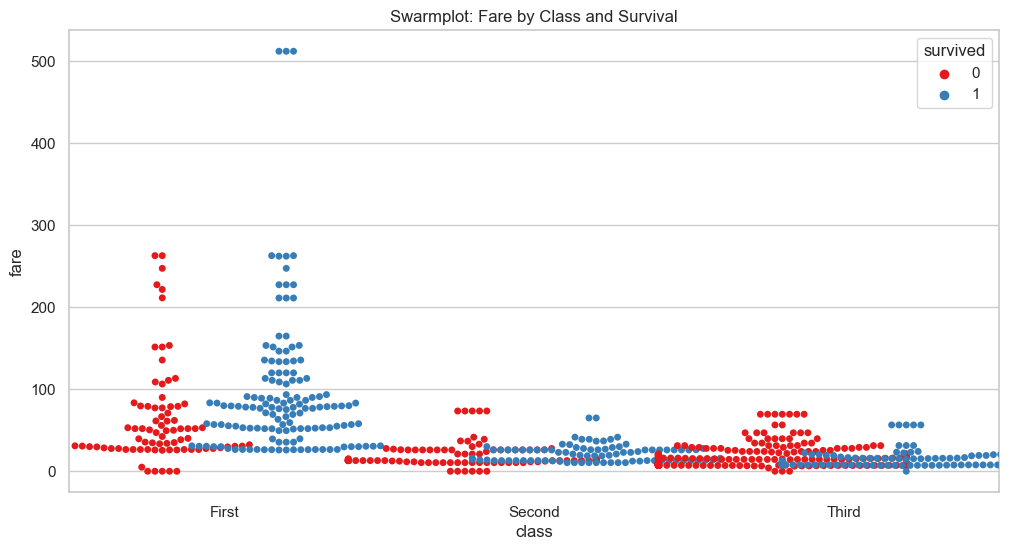

In [11]:
# Swarmplot: Fare vs Class vs Survival

plt.figure(figsize=(12, 6))

# Swarmplot draws a dot for every single passenger, avoiding overlap
# x='class': Group by Ticket Class
# y='fare': Vertical position is price
# hue='survived': Color is survival
sns.swarmplot(data=df, x='class', y='fare', hue='survived', palette='Set1', dodge=True)

plt.title('Swarmplot: Fare by Class and Survival')
plt.show()


### 🔎 How to Read This Chart
*   **Each Dot**: Represent one passenger.
*   **Cluster**: A thick swarm means many people paid that price.
*   **Color**: Red = Died, Blue = Survived.

### 💡 Key Inference
*   **Class Separation**: 1st Class fares (Left) go very high ($500). 3rd Class (Right) are all clustered low (<$100).
*   **The Difference**: In 3rd class, the swarm is mostly Red (Died). In 1st class, there is a lot of Blue (Survived).
*   **Outliers**: The few super-rich passengers (Top Left) all survived. Money likely bought safety.


### 📊 More Bivariate: Survival by Pclass, Embarked, Alone & Box Plots
- **Pclass / Embarked / Alone**: Bar plots show mean survival rate by category (same interpretation as Sex).
- **Box plots**: Age and Fare by Survival and Pclass show median, quartiles, and outliers; help compare distributions across groups.

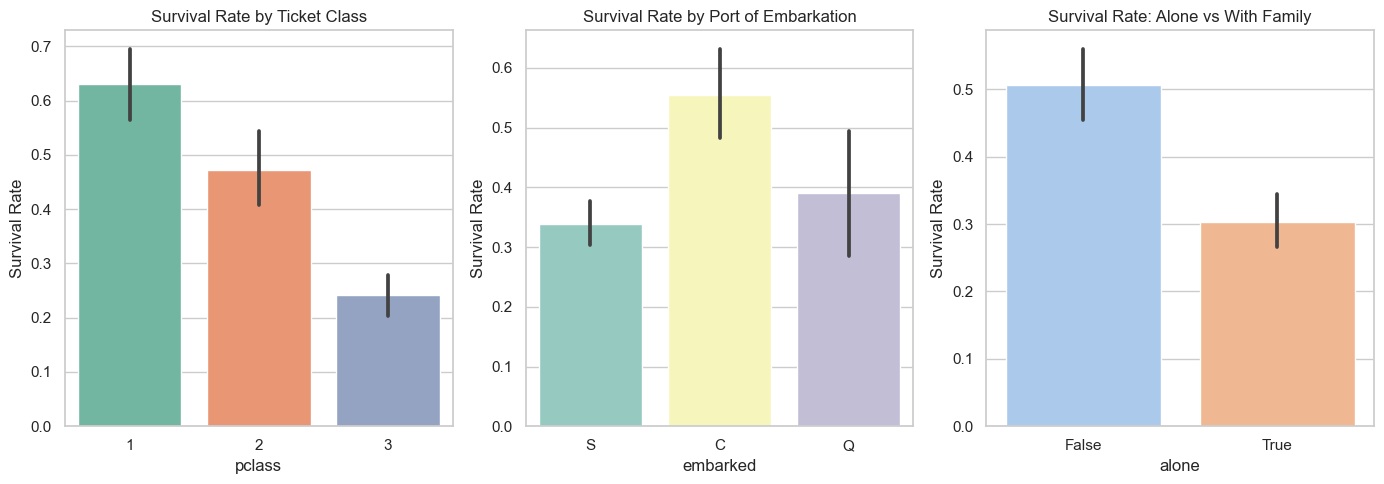

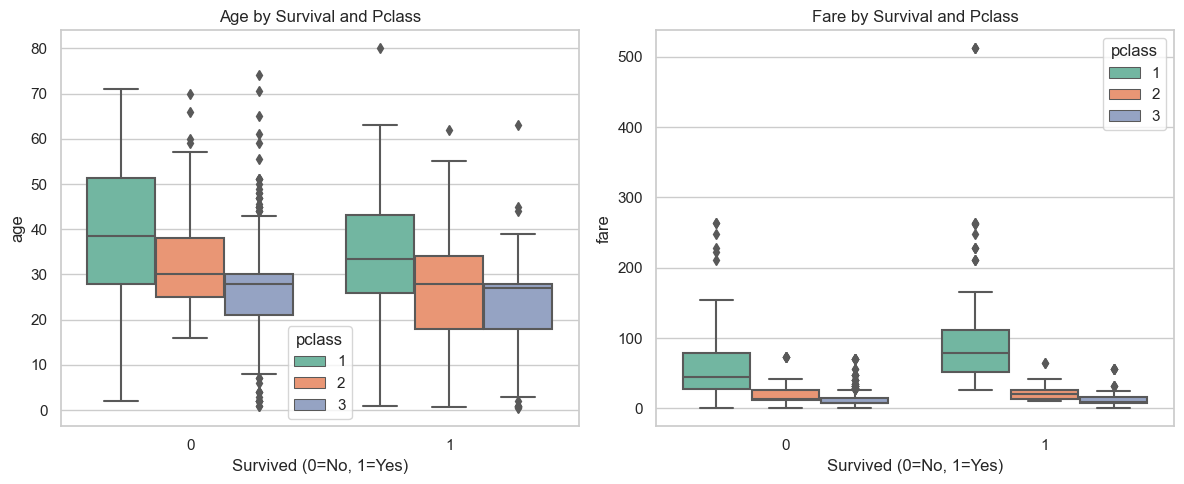

In [12]:
# Survival by Pclass, Embarked, Alone (bar plots)
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

sns.barplot(data=df, x='pclass', y='survived', palette='Set2', ax=axes[0])
axes[0].set_title('Survival Rate by Ticket Class')
axes[0].set_ylabel('Survival Rate')

sns.barplot(data=df, x='embarked', y='survived', palette='Set3', ax=axes[1])
axes[1].set_title('Survival Rate by Port of Embarkation')
axes[1].set_ylabel('Survival Rate')

sns.barplot(data=df, x='alone', y='survived', palette='pastel', ax=axes[2])
axes[2].set_title('Survival Rate: Alone vs With Family')
axes[2].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()

# Box plots: Age and Fare by Survival and Pclass
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=df, x='survived', y='age', hue='pclass', ax=axes[0], palette='Set2')
axes[0].set_title('Age by Survival and Pclass')
axes[0].set_xlabel('Survived (0=No, 1=Yes)')

sns.boxplot(data=df, x='survived', y='fare', hue='pclass', ax=axes[1], palette='Set2')
axes[1].set_title('Fare by Survival and Pclass')
axes[1].set_xlabel('Survived (0=No, 1=Yes)')
plt.tight_layout()
plt.show()

## 6. Multivariate Analysis
Checking interactions between multiple variables.


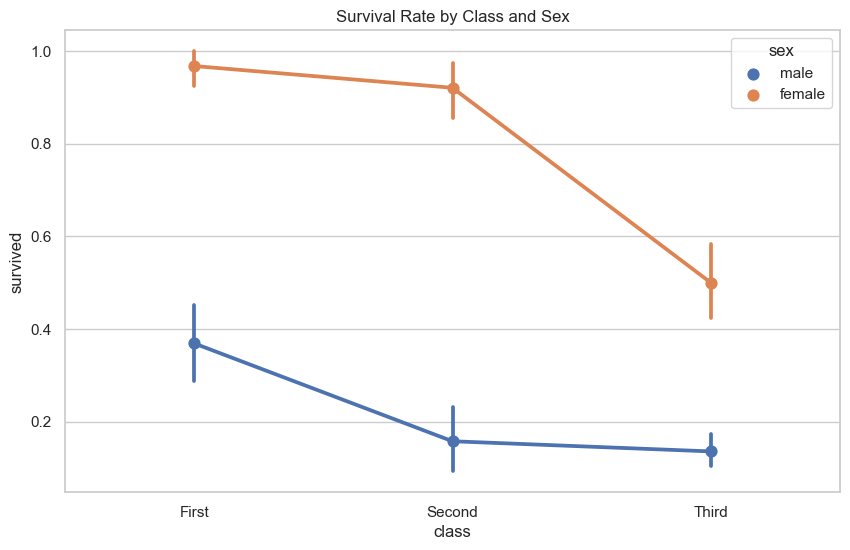

In [13]:
# Survival by Class and Sex (Point Plot)

plt.figure(figsize=(10, 6))

# Pointplot helps visualize interaction effects
sns.pointplot(data=df, x='class', y='survived', hue='sex', palette='deep')

plt.title('Survival Rate by Class and Sex')
plt.show()


### 🔎 How to Read This Chart
*   **Lines**: Show the trend across classes.
*   **Gap**: The vertical distance between the two lines is the difference caused by Gender.

### 💡 Key Inference
*   **Interaction**: Being female was good, but being a *3rd class female* was much riskier than being a 1st/2nd class female (The Blue line dips at the end).
*   **Males**: 1st Class males had slightly better survival than 2nd/3rd class males, but still much lower than the poorest females.


### 📋 Cross-Tabulation: Sex × Pclass × Survival
**pd.crosstab** counts passengers in each combination of Sex, Pclass, and Survival. **normalize='index'** gives row-wise percentages (within each Sex–Pclass group, what % survived). This quantifies the "women and children first" and class effect together.

Survival rate (%) by Sex and Pclass (row-wise):
               Died %  Survived %
sex    pclass                    
female 1          3.2        96.8
       2          7.9        92.1
       3         50.0        50.0
male   1         63.1        36.9
       2         84.3        15.7
       3         86.5        13.5


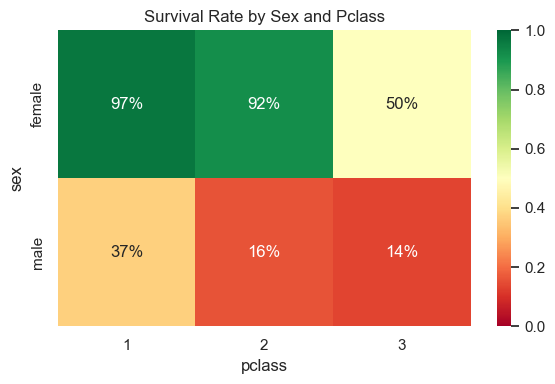

In [14]:
# Cross-tab: Survival rate by Sex and Pclass (row %)
ct = pd.crosstab([df['sex'], df['pclass']], df['survived'], normalize='index') * 100
ct.columns = ['Died %', 'Survived %']
print("Survival rate (%) by Sex and Pclass (row-wise):")
print(ct.round(1))

# Heatmap of survival rate by Sex and Pclass
survival_rate = df.groupby(['sex', 'pclass'])['survived'].mean().unstack()
plt.figure(figsize=(6, 4))
sns.heatmap(survival_rate, annot=True, fmt='.0%', cmap='RdYlGn', vmin=0, vmax=1)
plt.title('Survival Rate by Sex and Pclass')
plt.tight_layout()
plt.show()

### Special Analysis: Log-Scale Fare
Since `Fare` was so skewed, let's visualize it on a log scale to see strict price tiers.


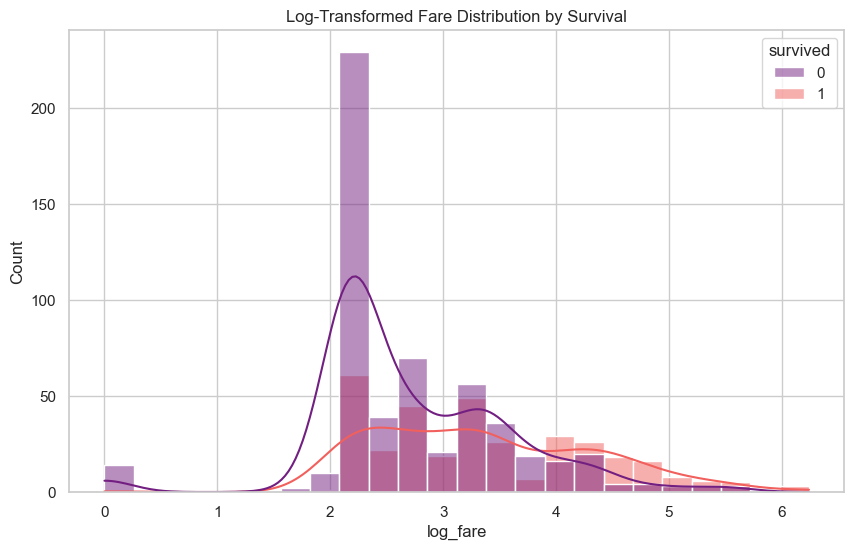

In [15]:
# Log-scale visualization (EDA only – no new column stored)
# np.log1p(x) = log(1+x) to handle zero fare; we pass it inline for the plot only
plt.figure(figsize=(10, 6))
sns.histplot(data=df.assign(log_fare=np.log1p(df['fare'])), x='log_fare', hue='survived', kde=True, palette='magma')
plt.title('Log-Transformed Fare Distribution by Survival')
plt.show()


### 💡 Key Inference
*   **Separation**: On a log scale, the separation between Survived (Orange) and Died (Purple) becomes clearer.
*   **Threshold**: Higher log-fare clearly shifts the probability towards Orange (Survival).


## 7. Conclusion & Insights
Based on our deep dive:

1.  **Priority Protocol**: "Women and Children" were strictly prioritized (Validated by Age KDE and Gender Barplot).
2.  **Class Warfare**: Wealth (Fare/Class) played a massive role. 1st class passengers had better access to lifeboats.
3.  **Age Factor**: Being a baby was a lifesaver. Being a young man (20-30) was a risk factor.
4.  **Visual EDA summary**: Sex, Pclass, Age, and Fare (and port/alone) all show clear patterns with survival in the plots and cross-tabs above.
